# catlog plots

## imports 

In [1]:
import os
import pickle
import pandas as pd

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import obspy
import earthquake
import util


from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from obspy.clients.fdsn import Client
import cartopy.crs as ccrs
import matplotlib.patches as patches
import pandas as pd
import cartopy.feature as cf
import matplotlib as mpl
import cmcrameri as cmc
from datetime import date
import cartopy.feature as cfeature

In [2]:

#+++++++PLOTTING++++++++++
# LINE_BY_MAG_TYPE = True
# COLOR_BY_MAG_TYPE = True

## load catalogs

In [3]:
list_mag = []
list_dist = []
list_iv2 = []
list_mag_types = []

In [4]:
eq_with_data = []
cat_with_data = obspy.Catalog()  # cat.copy()

In [5]:
ROOT = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
eq_list = os.listdir(ROOT)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

# cat_with_data.clear()
for event in cat:  # check earthquakes have data AND PICKS
    eq_name = util.catEventToFileName(event)
    if (os.path.isdir(ROOT+eq_name) and
            os.path.isdir(ROOT+eq_name+'/station_xml_files') and
            os.path.exists(ROOT+eq_name+'/picks.pkl')):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [6]:
ROOT = '/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'
eq_list = os.listdir(ROOT)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')

# cat_with_data.clear()
for event in cat:  # check earthquakes have data AND PICKS
    eq_name = util.catEventToFileName(event)
    if (os.path.isdir(ROOT+eq_name) and
            os.path.isdir(ROOT+eq_name+'/station_xml_files') and
            os.path.exists(ROOT+eq_name+'/picks.pkl')):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [7]:
ROOT = '/home/earthquakes1/homes/Rebecca/phd/data/2005_2018_global_m5/'
eq_list = os.listdir(ROOT)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2005_2018_global_m5_catalog.xml')

# cat_with_data.clear()
for event in cat:  # check earthquakes have data AND PICKS
    eq_name = util.catEventToFileName(event)
    if (os.path.isdir(ROOT+eq_name) and
            os.path.isdir(ROOT+eq_name+'/station_xml_files') and
            os.path.exists(ROOT+eq_name+'/picks.pkl')):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [8]:
cat_with_data

11139 Event(s) in Catalog:
2019-01-31T19:49:49.660000Z | -20.486,  -69.016 | 4.2  mb
2019-01-31T13:09:53.370000Z |  +8.978,  -83.758 | 4.9  Mwr
...
2017-12-05T15:13:49.820000Z | +36.399, +137.933 | 5.1  Mww
2017-12-01T04:31:38.820000Z | -21.472, +168.603 | 5.1  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [9]:
to_plot_list = []
for cat_entry in cat_with_data:
    if cat_entry.magnitudes[0].magnitude_type!=None:
        if cat_entry.magnitudes[0].magnitude_type[0:2].lower() in ['ml','mw','mb','md']:
            to_plot_list.append([cat_entry.origins[0].latitude, cat_entry.origins[0].longitude, cat_entry.origins[0].depth, cat_entry.magnitudes[0].mag, cat_entry.magnitudes[0].magnitude_type[0:2].lower(), cat_entry.origins[0].time])
to_plot=pd.DataFrame(to_plot_list, columns = ['lat', 'long', 'depth', 'mag', 'mag_type', 'time'])

In [10]:
cat_entry

Event:	2011-04-11T08:17:47.500000Z | +36.890, +140.720 | 5.7  None

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=4389096")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=5255488")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=23294966")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

## maps

### colored by magnitude

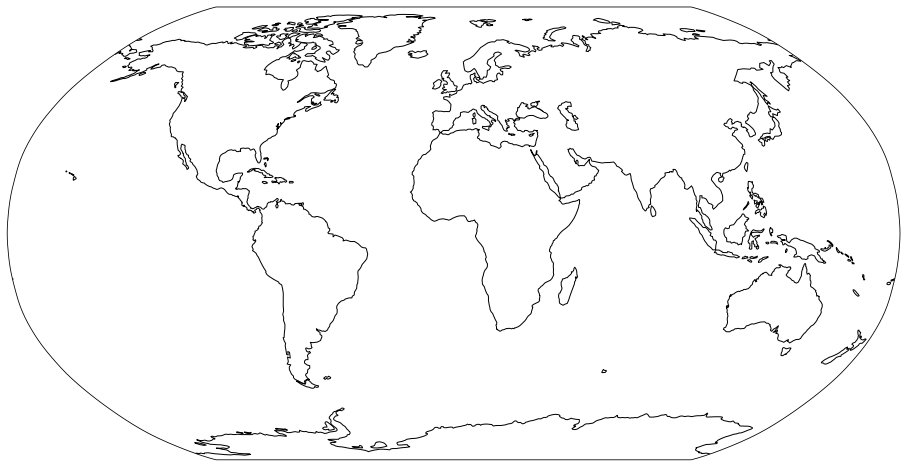

In [37]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson())
ax.coastlines()

In [45]:
lon = [2.906250000000000000e+02, 2.906250000000000000e+02, 2.906250000000000000e+02]

lat = [-5.315959537001968016e+01, -5.129437713895114825e+01,-4.942915369712304852e+01]

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig_scale = 2
fig = plt.figure(figsize=(4*fig_scale,3*fig_scale))
gs1 = plt.GridSpec(2, 1,height_ratios=[1, 0.05])
axes = plt.subplot(gs1[0,0], projection=ccrs.Robinson(central_longitude=0.0))


mappab = plt.scatter(x=lon, y=lat,
            transform=ccrs.PlateCarree())

axes.coastlines(color='grey')
axes.gridlines()
axes.set_global()
plt.show()

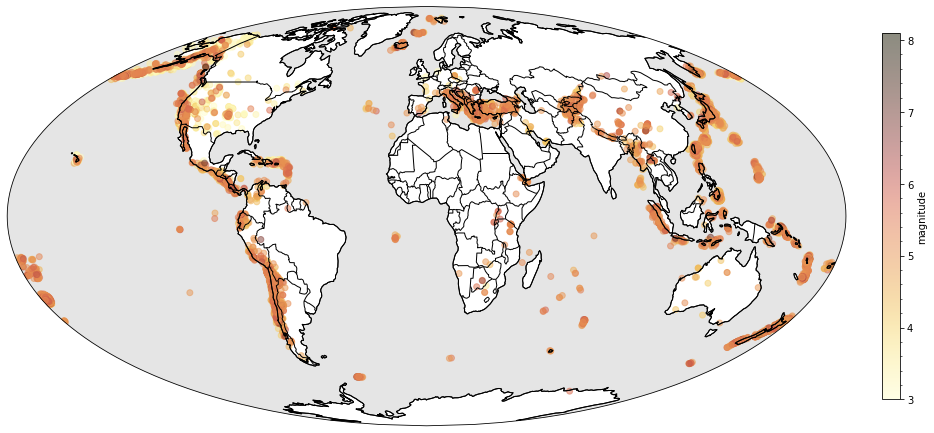

In [50]:
%matplotlib inline
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cfeature.OCEAN, color = 'silver', alpha = 0.4)
ax.add_feature(cfeature.LAND,color='white')

pts = plt.scatter(to_plot['long'], 
                 to_plot['lat'], 
                 c = list(to_plot.mag), 
                 cmap = cmc.cm.lajolla, 
                 marker = 'o',
                 alpha = 0.5, transform=ccrs.PlateCarree())
ax.set_global()
im_ratio = ax.bbox.width/ax.bbox.height
cbar = plt.colorbar(pts, fraction=0.015*im_ratio, pad=0.04, label='magnitude')
cbar.ax.minorticks_on()
ax.coastlines()
#cbar.ax.set_yticks(np.arange(0,105,5))
#cbar.ax.set_yticks(np.arange(0,110,20), ['0', '20','40','60','80','100+'])

plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/map_by_magnitude.png')

### colored by magntiude type

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


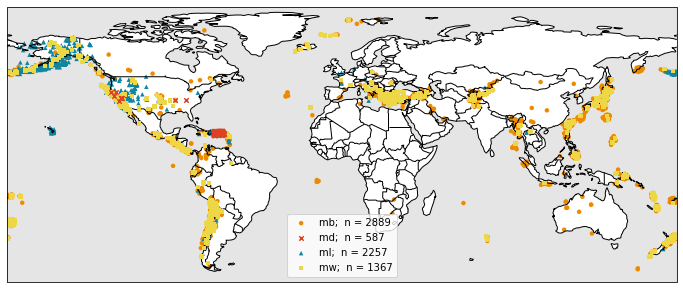

In [12]:
#%matplotlib qt
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
#markers = {'ml':'x','mw':'o','mb':'x','md':'^'}
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] != 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cfeature.OCEAN, color = 'silver', alpha = 0.4)
ax.add_feature(cfeature.LAND,color='white')
colors = {'ml':'#0f85a0','mw':'#edd746','mb':'#ed8b00','md':'#dd4124'}
#pts = ax.scatter(to_plot['long'], to_plot['lat'], c = list(to_plot.mag_type.map(colors)), marker = 'o', alpha = 0.5)
colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
groups = to_plot.groupby(['mag_type'])
markers = ['o','x','^','s']
zorders = [0,3,1,2]
for  j,(k,v) in enumerate(groups):
    ax.scatter(v.long,v.lat,
               color = colors[j],
               alpha = 1,
               marker = markers[j],
               s = 20,
               zorder = zorders[j],
               label = k + ';  n = ' + str(len(v.mag_type)),
              edgecolors='none')
im_ratio = ax.bbox.width/ax.bbox.height
#plt.colorbar(pts, fraction=0.01*im_ratio, pad=0.04, label='mag')
#for key in colors.keys():
#    ax.scatter(180,0, c = colors[key], label = key, marker = 'o')
plt.legend()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/map_by_magnitude_type.png')

### colored by depth

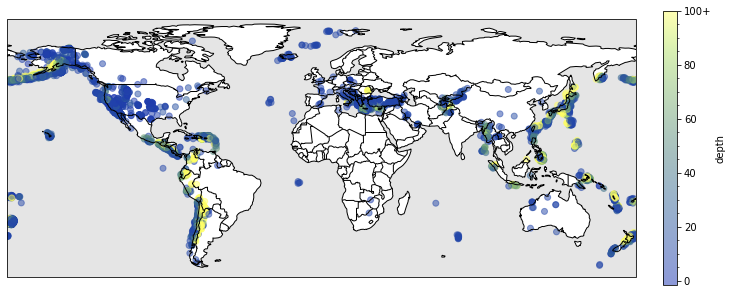

In [22]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cfeature.OCEAN, color = 'silver', alpha = 0.4)
ax.add_feature(cfeature.LAND,color='white')

pts = ax.scatter(to_plot['long'], 
                 to_plot['lat'], 
                 c = list(to_plot.depth/1000), 
                 cmap = cmc.cm.imola, 
                 marker = 'o',
                 alpha = 0.5, vmax = 100)


cbar = plt.colorbar(pts, fraction=0.02*im_ratio, pad=0.04, label='depth')
cbar.ax.minorticks_on()
cbar.ax.set_yticks(np.arange(0,105,5))
cbar.ax.set_yticks(np.arange(0,110,20), ['0', '20','40','60','80','100+'])

#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/map_by_depth.png')

## timelines

### timeline for different magntiude types

In [14]:
# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
from datetime import timedelta
dates = to_plot['time']
min_date = date(np.min(dates).year, np.min(dates).month, np.min(dates).day)-timedelta(days = 5)
max_date = date(np.max(dates).year, np.max(dates).month, np.max(dates).day)+timedelta(days = 20)

([], [])

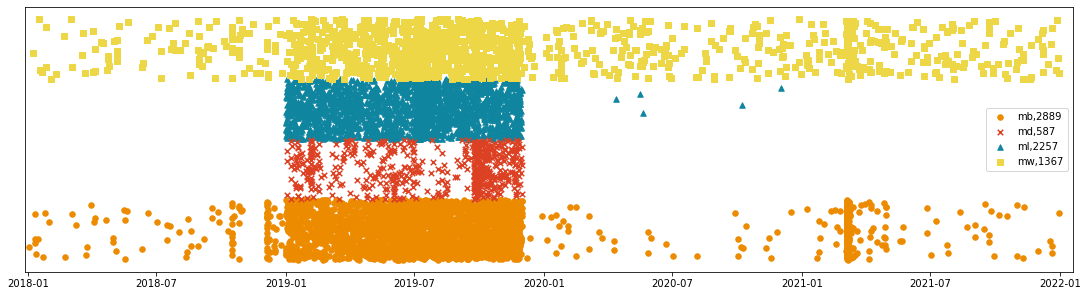

In [15]:
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
#_ = ax.set_ylim(-0.1, 1.1)
_ = ax.set_xlim(min_date, max_date)
#_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
y = np.random.rand(len(dates))
#_ = ax.scatter(dates, y, s=120, c = list(to_plot.mag_type.map(colors)), marker = '.')

colors = ['#ed8b00','#dd4124','#0f85a0','#edd746']
groups = to_plot.groupby(['mag_type'])
markers = ['o','x','^','s']
zorders = [0,3,1,2]

for  j,(k,v) in enumerate(groups):
    ax.scatter(v.time,np.zeros(len(v.time))+j+np.random.rand(len(v.time)),
               color = colors[j],
               alpha = 1,
               marker = markers[j],
               s = 30,
               zorder = zorders[j],
               label = k + ',' + str(len(v.mag_type)))
plt.legend()
plt.yticks([])

## histograms

### magnitudes

In [10]:
n, bins = np.histogram(to_plot.mag, np.arange(3,8,0.1))
n2, bins2 = np.histogram(to_plot.mag, np.arange(3,8,0.5))

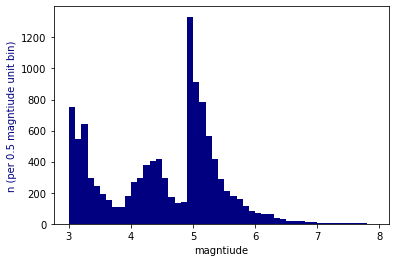

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.stairs(n, bins, fill = True, color = 'navy', zorder = 10)
#ax2 = ax.twinx()
#ax2.stairs(n2, bins2, fill = True, zorder = 100, alpha = 0.2, color = 'grey')
ax.set_ylabel('n (per 0.5 magntiude unit bin)', color = 'navy')
#ax2.set_ylabel('n (per 0.5 magnitude unit bin)', color = 'black')
ax.set_xlabel('magntiude')
#ax.set_yscale('log')
#ax2.set_yscale('log')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/datasets/gutenberg_richter_not_log.pdf', dpi = 400)

### depths

In [17]:
n, bins = np.histogram(to_plot.depth/1000, np.arange(0, 750, 10))
n2, bins2 = np.histogram(to_plot.depth/1000, np.arange(0, 750, 50))

Text(0.5, 0, 'depth (km)')

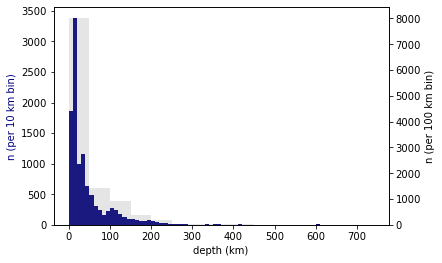

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.stairs(n, bins, fill = True, color = 'navy', zorder = 10)
ax2 = ax.twinx()
ax2.stairs(n2, bins2, fill = True, zorder = 100, alpha = 0.2, color = 'grey')
ax.set_ylabel('n (per 10 km bin)', color = 'navy')
ax2.set_ylabel('n (per 100 km bin)', color = 'black')
ax.set_xlabel('depth (km)')